# Etapas

### Etapa 1: Análise Exploratória de Dados
- 1.1: Realizar Importação de Dados e Primeira Análise
- 1.2: Verificar Valores Nulos

### Etapa 2: Preparação de Dados
- 2.1: Tratar Coluna 'category'
- 2.2: Criar Coluna Tags
- 2.3: Processar Coluna Tags
- 2.4: Remover Stop Words
- 2.5: Aplicar Steeming
- 2.6: Count Vectorizer

### Etapa 3: Construção de Modelo de Similaridade de Cosseno
- 3.1: Construir Modelo
- 3.2: Criar Algoritmo de Recomendações
- 3.3: Criar Sustema de Recomendações Alternativo

# Etapa 1: Análise Exploratória de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

### 1.1: Realizar Importação de Dados e Primeira Análise

In [2]:
amazon_df = pd.read_csv("amazon.csv")
amazon_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [3]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### 1.2: Verificar Valores Nulos

In [4]:
amazon_df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

# Etapa 2: Preparação de Dados

In [5]:
amazon_df_clean = amazon_df.copy()

### 2.1: Tratar Coluna "category"

In [6]:
amazon_df_clean['category'].head()

0    Computers&Accessories|Accessories&Peripherals|...
1    Computers&Accessories|Accessories&Peripherals|...
2    Computers&Accessories|Accessories&Peripherals|...
3    Computers&Accessories|Accessories&Peripherals|...
4    Computers&Accessories|Accessories&Peripherals|...
Name: category, dtype: object

In [7]:
amazon_df_clean['category'] = amazon_df_clean['category'].str.replace('|', ' ')

In [8]:
amazon_df_clean.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories Accessories&Peripherals ...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories Accessories&Peripherals ...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories Accessories&Peripherals ...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories Accessories&Peripherals ...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories Accessories&Peripherals ...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [9]:
amazon_df_clean['category'][0]

'Computers&Accessories Accessories&Peripherals Cables&Accessories Cables USBCables'

### 2.2: Criar Coluna Tags

In [10]:
def criar_coluna_tags(dataframe, colunas):
    dataframe[colunas] = dataframe[colunas].astype(str)
    dataframe['tags'] = dataframe[colunas].agg(" ".join, axis=1)

In [11]:
criar_coluna_tags(amazon_df_clean, ['product_id', 'product_name', 'category', 'actual_price', 'rating', 'rating_count', 'about_product', 'review_title', 'review_content'])

In [12]:
amazon_df_clean['tags'].head()

0    B07JW9H4J1 Wayona Nylon Braided USB to Lightni...
1    B098NS6PVG Ambrane Unbreakable 60W / 3A Fast C...
2    B096MSW6CT Sounce Fast Phone Charging Cable & ...
3    B08HDJ86NZ boAt Deuce USB 300 2 in 1 Type-C & ...
4    B08CF3B7N1 Portronics Konnect L 1.2M Fast Char...
Name: tags, dtype: object

In [13]:
amazon_df_clean['tags'][0]

"B07JW9H4J1 Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey) Computers&Accessories Accessories&Peripherals Cables&Accessories Cables USBCables ₹1,099 4.2 24,269 High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding

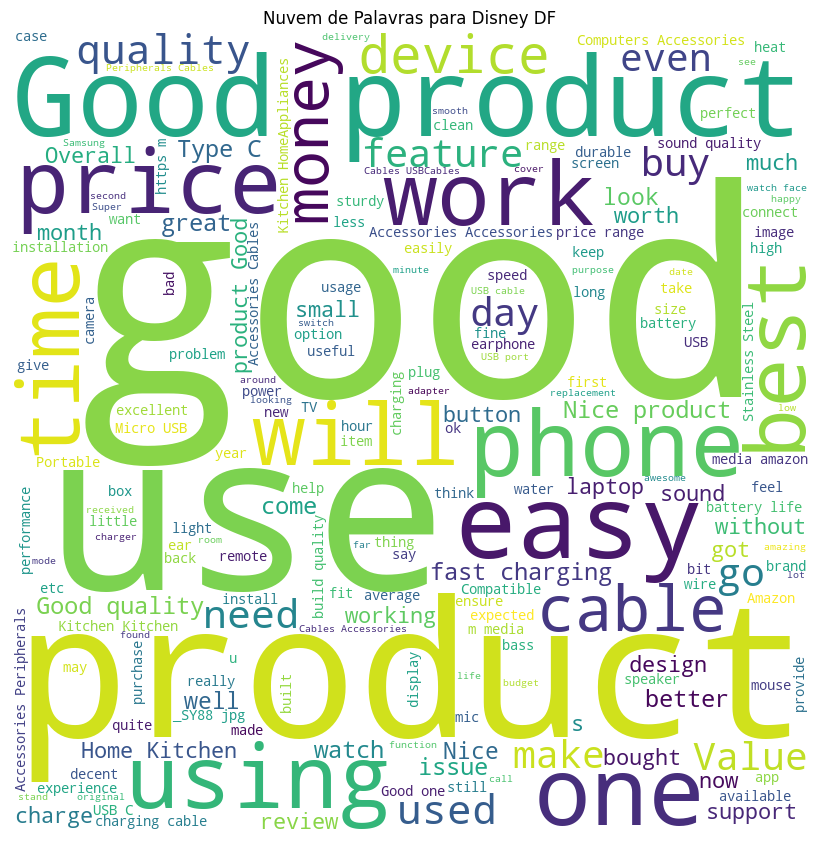

In [14]:
from wordcloud import WordCloud

# Juntar todas as tags para o alvo 0
tags_0 = ' '.join(amazon_df_clean['tags'])

# Gerar nuvem de palavras para o alvo 0
nuvem_palavras_0 = WordCloud(width=800, height=800, 
                             background_color='white', 
                             stopwords=None, 
                             min_font_size=10).generate(tags_0)

# Plotar nuvem de palavras para o alvo 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(nuvem_palavras_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Nuvem de Palavras para Disney DF')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('nuvem_palavras_alvo_0.png', bbox_inches='tight')

plt.show()

Essa é uma nuvem de palavras da coluna "tags" sem nenhum tipo de processamento. Como podemos observar, não existe padrão gramatical nas tags, além de existir diversas tags que não são muito relevantes nesse caso.

### 2.3: Processar Coluna Tags

In [15]:
def processar_tags(tags):
    # Remove qualquer tag que comece com 'http'
    tags = re.sub(r"http\S+", "", tags)  
    # Remover nan 
    tags = re.sub(r"\bnan\b", "", tags)
    # Substitui todos os caracteres não alfabéticos e não numéricos por espaços
    tags = re.sub(r"[^a-zA-Z0-9\s]", "", tags)
    # Substitui múltiplos espaços por um único espaço
    tags = re.sub(r'\s+', ' ', tags)
    # Converte o texto para minúsculas
    tags = tags.lower()
    return tags

In [16]:
def aplicar_processar_tags(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(processar_tags)

In [17]:
aplicar_processar_tags(amazon_df_clean, 'tags')

In [18]:
amazon_df_clean['tags'].head()

0    b07jw9h4j1 wayona nylon braided usb to lightni...
1    b098ns6pvg ambrane unbreakable 60w 3a fast cha...
2    b096msw6ct sounce fast phone charging cable da...
3    b08hdj86nz boat deuce usb 300 2 in 1 typec mic...
4    b08cf3b7n1 portronics konnect l 12m fast charg...
Name: tags, dtype: object

In [19]:
amazon_df_clean['tags'][0]

'b07jw9h4j1 wayona nylon braided usb to lightning fast charging and data sync cable compatible for iphone 13 1211 x 8 7 6 5 ipad air pro mini 3 ft pack of 1 grey computersaccessories accessoriesperipherals cablesaccessories cables usbcables 1099 42 24269 high compatibility compatible with iphone 12 11 xxsmaxxr iphone 88 plusiphone 77 plusiphone 6s6s plusiphone 66 plusiphone 55s5cseipad proipad air 12ipad mini 123ipod nano7ipod touch and more apple devicesfast chargedata sync it can charge and sync simultaneously at a rapid speed compatible with any charging adaptor multiport charging station or power bankdurability durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibilityhigh security level it is designed to fully protect your device from damaging excessive currentcopper core thickmultilayer shielding antiinterference protective circuit equipmentwarranty 12 months

### 2.4: Remover Stop Words

In [20]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yamas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def remover_stopwords(texto):
    palavras = texto.split()
    palavras_filtradas = [palavra for palavra in palavras if palavra not in stop_words]
    return ' '.join(palavras_filtradas)

In [22]:
def aplicar_remover_stopwords(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(remover_stopwords)

In [23]:
aplicar_remover_stopwords(amazon_df_clean, 'tags')

In [24]:
amazon_df_clean['tags'].head()

0    b07jw9h4j1 wayona nylon braided usb lightning ...
1    b098ns6pvg ambrane unbreakable 60w 3a fast cha...
2    b096msw6ct sounce fast phone charging cable da...
3    b08hdj86nz boat deuce usb 300 2 1 typec micro ...
4    b08cf3b7n1 portronics konnect l 12m fast charg...
Name: tags, dtype: object

In [25]:
amazon_df_clean['tags'][0]

'b07jw9h4j1 wayona nylon braided usb lightning fast charging data sync cable compatible iphone 13 1211 x 8 7 6 5 ipad air pro mini 3 ft pack 1 grey computersaccessories accessoriesperipherals cablesaccessories cables usbcables 1099 42 24269 high compatibility compatible iphone 12 11 xxsmaxxr iphone 88 plusiphone 77 plusiphone 6s6s plusiphone 66 plusiphone 55s5cseipad proipad air 12ipad mini 123ipod nano7ipod touch apple devicesfast chargedata sync charge sync simultaneously rapid speed compatible charging adaptor multiport charging station power bankdurability durable nylon braided design premium aluminum housing toughened nylon fiber wound tightly around cord lending superior durability adding bit flexibilityhigh security level designed fully protect device damaging excessive currentcopper core thickmultilayer shielding antiinterference protective circuit equipmentwarranty 12 months warranty friendly customer services ensures longtime enjoyment purchase meet question problem please do

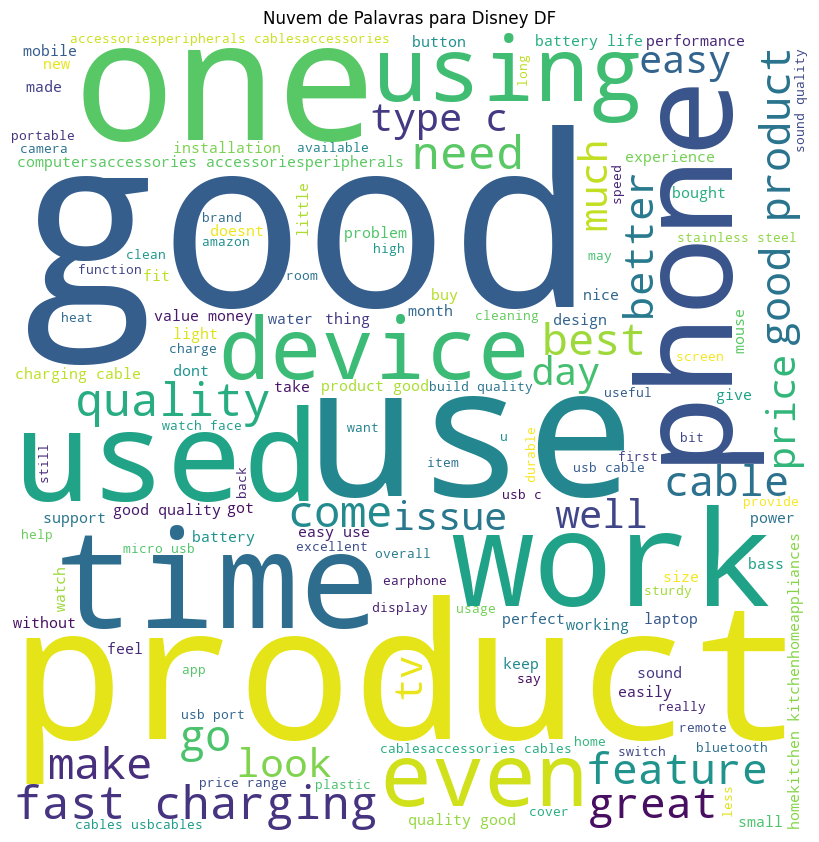

In [26]:
# Juntar todas as tags para o alvo 0
tags_0 = ' '.join(amazon_df_clean['tags'])

# Gerar nuvem de palavras para o alvo 0
nuvem_palavras_0 = WordCloud(width=800, height=800, 
                             background_color='white', 
                             stopwords=None, 
                             min_font_size=10).generate(tags_0)

# Plotar nuvem de palavras para o alvo 0
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(nuvem_palavras_0) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.title('Nuvem de Palavras para Disney DF')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('nuvem_palavras_alvo_0.png', bbox_inches='tight')

plt.show()

### 2.5: Aplicar Stemming

In [27]:
from nltk.stem import PorterStemmer

# Inicializa o stemmer
stemmer = PorterStemmer()

In [28]:
def stemming(texto):
    palavras = texto.split()
    palavras_stem = [stemmer.stem(palavra) for palavra in palavras]
    return ' '.join(palavras_stem)

In [29]:
def aplicar_stemming(dataframe, coluna):
    dataframe[coluna] = dataframe[coluna].astype(str)
    dataframe[coluna] = dataframe[coluna].apply(stemming)

In [30]:
aplicar_stemming(amazon_df_clean, 'tags')

In [31]:
amazon_df_clean['tags'].head()

0    b07jw9h4j1 wayona nylon braid usb lightn fast ...
1    b098ns6pvg ambran unbreak 60w 3a fast charg 15...
2    b096msw6ct sounc fast phone charg cabl data sy...
3    b08hdj86nz boat deuc usb 300 2 1 typec micro u...
4    b08cf3b7n1 portron konnect l 12m fast charg 3a...
Name: tags, dtype: object

In [32]:
amazon_df_clean['tags'][4]

'b08cf3b7n1 portron konnect l 12m fast charg 3a 8 pin usb cabl charg sync function iphon ipad grey computersaccessori accessoriesperipher cablesaccessori cabl usbcabl 399 42 16905 charg sync function cabl come charg data sync functionhigh qualiti materi tpe nylon materi make sure life cabl enhanc significantlylong cord cabl extra thick 12 meter long optim easi use comfort home officemor durablethi cabl uniqu interm design multius posit provid best comfort perform usingunivers compat compat devic like iphon xs x xr 8 7 6s 6 5s ipad pro ipad mini ipad air good originaldecentgood one secondari usebest qualitygoodamaz product mind blow pricenic qualitygood product bought instead origin appl work 150r fast appl charger good option want cheap good product bought ipad pro 105 work flawlessli build qualiti ok like gonna hang cloth want strong cabl even braid cabl stop work year use anker appl store strong braid cabl stop work year pleas dont buy high end cabl instead choos one even stop work w

### 2.6: Count Vectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [34]:
vector = vectorizer.fit_transform(amazon_df_clean['tags']).toarray()

# Etapa 3: Construção de Modelo de Similaridade de Cosseno

### 3.1: Construir Modelo

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vector)

In [36]:
similarity.shape

(1465, 1465)

### 3.2: Criar Sistema de Recomendações

In [37]:
def recomendar(product_id):
    index = amazon_df[amazon_df['product_id'] == product_id].index[0]
    print("Searched Item:")
    print(amazon_df.iloc[index].product_name)
    
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    print("\nRecommendations:")
    for i in distances[1:11]:
        print(amazon_df.iloc[i[0]].product_name)

In [38]:
recomendar('B0BBLHTRM9')

Searched Item:
IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1

Recommendations:
IONIX Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water | Tap filter Multilayer | Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1
AVNISH Tap Water Purifier Filter Faucet 6 Layer Carbon Activated Dust Chlorine Remover Water Softener for Drinking Cartridge Alkaline Taps for Kitchen Sink Bathroom Wash Basin (6-Layer Filtration)
Aqua d pure Active Copper 12-L RO+UV Water Filter Purifier for Home, Kitchen Fully Automatic UF+TDS Controller
Sure From Aquaguard Delight NXT RO+UV+UF+Taste Adjuster(MTDS),6L water purifier,8 stages purification,Suitable for borewell,tanker,municipal water(Black) from Eureka Forbes
Proven® Copper + Mineral RO+UV+UF 10 to 12 Liter RO + UV + TDS ADJUSTER Water Purifier with Copper Charge Technology

In [39]:
recomendar('B0B3XXSB1K')

Searched Item:
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black)

Recommendations:
LG 108 cm (43 inches) 4K Ultra HD Smart LED TV 43UQ7500PSF (Ceramic Black)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LQ576BPSA (Ceramic Black)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)
Hisense 108 cm (43 inches) 4K Ultra HD Smart Certified Android LED TV 43A6GE (Black)
OnePlus 108 cm (43 inches) Y Series 4K Ultra HD Smart Android LED TV 43Y1S Pro (Black)
VU 138 cm (55 inches) Premium Series 4K Ultra HD Smart IPS LED TV 55UT (Black)
OnePlus 126 cm (50 inches) Y Series 4K Ultra HD Smart Android LED TV 50Y1S Pro (Black)
Redmi 108 cm (43 inches) 4K Ultra HD Android Smart LED TV X43 | L43R7-7AIN (Black)
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)


### 3.3: Criar Sistema de Recomendações Alternativo

In [40]:
from fuzzywuzzy import process

def recomendar_por_titulo_alternativo(titulo_parcial):
    titulo_parcial = titulo_parcial.lower()  # Padroniza o título inserido
    # Cria uma lista com os títulos do dataframe
    titles = amazon_df['product_name'].tolist()

    # Encontra o título mais próximo usando fuzzywuzzy
    best_match, score = process.extractOne(titulo_parcial, titles)

    # Se o score for alto o suficiente (exemplo, 50 ou mais), pega o índice do produto
    if score > 50:
        matching_produtos = amazon_df[amazon_df['product_name'] == best_match]
        index = matching_produtos.index[0]
        distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
        
        print("Item Pesquisado:")
        print(amazon_df.iloc[index].product_name)
        print("\nRecomendações:")
        
        for i in distances[1:11]:  # Exibir os 10 produtos mais similares
            print(amazon_df.iloc[i[0]].product_name)
    else:
        print("Nenhum produto encontrado com um bom grau de correspondência.")


In [41]:
recomendar_por_titulo_alternativo('lg 108 cm (43 inches)')

Item Pesquisado:
LG 108 cm (43 inches) 4K Ultra HD Smart LED TV 43UQ7500PSF (Ceramic Black)

Recomendações:
LG 139 cm (55 inches) 4K Ultra HD Smart LED TV 55UQ7500PSF (Ceramic Black)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LQ576BPSA (Ceramic Black)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)
LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)
Hisense 108 cm (43 inches) 4K Ultra HD Smart Certified Android LED TV 43A6GE (Black)
OnePlus 108 cm (43 inches) Y Series 4K Ultra HD Smart Android LED TV 43Y1S Pro (Black)
VU 138 cm (55 inches) Premium Series 4K Ultra HD Smart IPS LED TV 55UT (Black)
OnePlus 126 cm (50 inches) Y Series 4K Ultra HD Smart Android LED TV 50Y1S Pro (Black)
Redmi 108 cm (43 inches) 4K Ultra HD Android Smart LED TV X43 | L43R7-7AIN (Black)
Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)


In [42]:
recomendar_por_titulo_alternativo('IONIX tap filter Multilayer')

Item Pesquisado:
IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1

Recomendações:
IONIX Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water | Tap filter Multilayer | Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1
AVNISH Tap Water Purifier Filter Faucet 6 Layer Carbon Activated Dust Chlorine Remover Water Softener for Drinking Cartridge Alkaline Taps for Kitchen Sink Bathroom Wash Basin (6-Layer Filtration)
Aqua d pure Active Copper 12-L RO+UV Water Filter Purifier for Home, Kitchen Fully Automatic UF+TDS Controller
Sure From Aquaguard Delight NXT RO+UV+UF+Taste Adjuster(MTDS),6L water purifier,8 stages purification,Suitable for borewell,tanker,municipal water(Black) from Eureka Forbes
Proven® Copper + Mineral RO+UV+UF 10 to 12 Liter RO + UV + TDS ADJUSTER Water Purifier with Copper Charge Technology